In [51]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [52]:
%reload_ext autoreload
%autoreload 2

# MIDS - w261 Machine Learning At Scale
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

## Assignment - HW11


---
__Name:__  Megan Jasek   
__Class:__ MIDS w261 - Summer 2016 - Group 2  
__Email:__  meganjasek@iSchool.Berkeley.edu     
__Week:__   11

# Table of Contents <a name="TOC"></a> 

1.  [HW Intructions](#1)   
2.  [HW References](#2)
3.  [HW Problems](#3)   
    HW11.0.  [Broadcast versus Caching in Spark ](#HW11.0)    
    HW11.1.  [HW11.2 Gradient descent](#HW11.1)   
    HW11.2.  [Gradient descent](#HW11.2)    
    HW11.3.  [Logistic Regression](#HW11.3)    
    HW11.4.  [SVMs](#HW11.4)  
    HW11.5.  [OPTIONAL  Distributed Perceptron algorithm](#HW11.5)  
    HW11.6.  [OPTIONAL  Evalution of perceptron algorihtms on PennTreeBank POS corpus](#HW11.6)  
    HW11.7.  [OPTIONAL Kernal Adatron](#HW11.7)
   
    HW11.8.  [OPTIONAL Create an animation of gradient descent for the Perceptron](#HW11.8)



<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)

MIDS UC Berkeley, Machine Learning at Scale
DATSCIW261 ASSIGNMENT #11

Version 2016-07-27 (FINAL)


 === INSTRUCTIONS for SUBMISSIONS ===
Follow the instructions for submissions carefully.

https://docs.google.com/forms/d/1ZOr9RnIe_A06AcZDB6K1mJN4vrLeSmS2PD6Xm3eOiis/viewform?usp=send_form 


=== IMPORTANT ===

TYPE-2 Fun option: Submit HW11 using a Zeppelin notebook (See Live slides for install instructions)

TYPE-1.5 Fun option: Complete HW11.8 only (no need to complete the rest of the questions)

HW11 can be completed locally on your computer
### Documents:
* IPython Notebook, published and viewable online.
* PDF export of IPython Notebook.
    
<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. (Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))

<a name="3">
# HW Problems
[Back to Table of Contents](#TOC)

<a name="HW11.0"></a><h2 style="color:darkblue"> HW11.0: Broadcast versus Caching in Spark </h2>
[Back to Table of Contents](#TOC)


HW11.0  

Q: __What is the difference between broadcasting and caching data in Spark? Give an example (in the context of machine learning) of each mechanism (at a highlevel). Feel free to cut and paste code examples from the lectures to support your answer.__

**ANSWER:**  
??see slide 29 of lecture 11

Q: __Review the following Spark-notebook-based implementation of KMeans and use the broadcast pattern to make this implementation more efficient. Please describe your changes in English first, implement, comment your code and highlight your changes:

Notebook
https://www.dropbox.com/s/41q9lgyqhy8ed5g/EM-Kmeans.ipynb?dl=0

Notebook via NBViewer
http://nbviewer.ipython.org/urls/dl.dropbox.com/s/41q9lgyqhy8ed5g/EM-Kmeans.ipynb


In [1]:
import pyspark
from pyspark.sql import SQLContext

# We can give a name to our app (to find it in Spark WebUI) and configure execution mode
# In this case, it is local multicore execution with "local[*]"
app_name = "HW11"
master = "local[*]"
conf = pyspark.SparkConf().setAppName(app_name).setMaster(master)
sc.stop()
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)

print sc
print sqlContext

<a name="HW11.1"> <h2 style="color:darkgreen">HW11.1 Loss Functions</h2>
[Back to Table of Contents](#TOC)
 
In the context of binary classification problems, does the linear SVM learning algorithm yield the same result as a L2 penalized logistic regesssion learning algorithm? 

In your reponse, please discuss the loss functions, and the learnt models, and separating surfaces between the two classes.

In the context of binary classification problems, does the linear SVM learning algorithm yield the same result as a perceptron learning algorithm? 

[OPTIONAL]: generate an artifical binary classification dataset with 2 input features and plot the learnt separating surface for both a linear SVM and for  logistic regression. Comment on the learnt surfaces. Please feel free to do this in Python (no need to use Spark).

In [53]:
## Code goes here

In [54]:
## Drivers & Runners

In [55]:
## Run Scripts, S3 Sync

<a name="HW11.2"><h2 style="color:darkgreen">HW11.2 Gradient descent</h2>
[Back to Table of Contents](#TOC)

In the context of logistic regression describe and define three flavors of penalized loss functions.  Are these all supported in Spark MLLib (include online references to support your answers)?

Descibe probabilitic interpretations of the L1 and L2 priors for penalized logistic regression (HINT: see synchronous slides for week 11 for details)


In [56]:
## Code goes here

In [57]:
## Drivers & Runners

In [58]:
## Run Scripts, S3 Sync

<a name="HW11.3"> <h2 style="color:darkblue"> HW11.3 Logistic Regression</h2>
[Back to Table of Contents](#TOC)

Generate 2 sets of linearly separable data with 100 data points each using the data generation code provided below and plot each in separate plots. Call one the training set and the other the testing set.

```python
def generateData(n):
""" 
  generates a 2D linearly separable dataset with n samples. 
  The third element of the sample is the label
"""
xb = (rand(n)*2-1)/2-0.5
yb = (rand(n)*2-1)/2+0.5
xr = (rand(n)*2-1)/2+0.5
yr = (rand(n)*2-1)/2-0.5
inputs = []
for i in range(len(xb)):
  inputs.append([xb[i],yb[i],1])
  inputs.append([xr[i],yr[i],-1])
return inputs

```
Modify this data generation code to generating non-linearly separable training and testing datasets (with approximately 10% of the data falling on the wrong side of the separating hyperplane. Plot the resulting datasets. 

NOTE: For the remainder of this problem please use the non-linearly separable training and testing datasets.

Using MLLib train up a LASSO logistic regression model with the training dataset and evaluate with the testing set. What is a good number of iterations for training the logistic regression model? Justify with plots and words. 

Derive and implement in Spark a weighted LASSO logistic regression. Implement a convergence test of your choice to check for termination within your training algorithm. 

Weight the above training dataset as follows:  Weight each example using the inverse vector length (Euclidean norm): 

>weight(X)= 1/||X||, 

>where ||X|| = SQRT(X.X)= SQRT(X1^2 + X2^2)

>Here X is vector made up of X1 and X2.

Evaluate your homegrown weighted  LASSO logistic regression on the test dataset. Report misclassification error (1 - Accuracy) and how many iterations does it took to converge.

Does Spark MLLib have a weighted LASSO logistic regression implementation. If so use it and report your findings on the weighted training set and test set. 

### HW11: Helper functions for 

In [2]:
%matplotlib inline
import pylab

# Plot data points but don't display them
def plot_data_no_show(samples, shape_str, color_str_pos, color_str_neg, title):
    for data in samples:
        color_str = color_str_pos
        if data[2] == -1:
            color_str = color_str_neg
        pylab.plot(data[0], data[1], shape_str, color = color_str)
    pylab.title(title)

# Plot data points and display them
def plot_data(samples, shape_str, color_str_pos, color_str_neg, title):
    plot_data_no_show(samples, shape_str, color_str_pos, color_str_neg, title)
    pylab.show()

### HW11.3:  Generate testing set and training set

In [3]:
import numpy as np

# Set a random seed so results are consistent across multiple runs
np.random.seed(114)

def generateData(n, filename):
    """
        generates a 2D linearly separable dataset with n samples. 
        The third element of the sample is the label
    """
    # Write the datapoints to filename.  Swap the position of the label to the 1st element
    # when writing to the file for later use.
    with open(filename, 'w') as f:
        xb = (np.random.rand(n)*2-1)/2-0.5
        yb = (np.random.rand(n)*2-1)/2+0.5
        xr = (np.random.rand(n)*2-1)/2+0.5
        yr = (np.random.rand(n)*2-1)/2-0.5
        inputs = []
        for i in range(len(xb)):
            inputs.append([xb[i],yb[i],1])
            inputs.append([xr[i],yr[i],-1])
            f.write('%f, %f, %f\n' % (1.0, xb[i], yb[i]))
            f.write('%f, %f, %f\n' % (-1.0, xr[i], yr[i]))
    return inputs

def generateNonSeperableData(n, filename):
    """
        generates a 2D linearly non-separable dataset with n samples. 
        The third element of the sample is the label
    """
    # Write the datapoints to filename.  Swap the position of the label to the 1st element
    # when writing to the file for later use.
    with open(filename, 'w') as f:
        xb = (np.random.rand(n)*2-1)/2-0.5
        yb = (np.random.rand(n)*2-1)/2+0.5
        xr = (np.random.rand(n)*2-1)/2+0.5
        yr = (np.random.rand(n)*2-1)/2-0.5
        inputs = []
        for i in range(len(xb)):
            # For 10% of the data points, swap the label from 1 to -1, so that they
            # end up on the other side of the decision boundary
            if i < n/10:
                inputs.append([xb[i],yb[i],-1])
                inputs.append([xr[i],yr[i],1]) 
                f.write('%f, %f, %f\n' % (-1.0, xb[i], yb[i]))
                f.write('%f, %f, %f\n' % (1.0, xr[i], yr[i]))
            else:
                inputs.append([xb[i],yb[i],1])
                inputs.append([xr[i],yr[i],-1])
                f.write('%f, %f, %f\n' % (1.0, xb[i], yb[i]))
                f.write('%f, %f, %f\n' % (-1.0, xr[i], yr[i]))
    return inputs

train_sep = generateData(100, 'train_sep.csv')
test_sep = generateData(100, 'test_sep.csv')

train_nonsep = generateNonSeperableData(100, 'train_nonsep.csv')
test_nonsep = generateNonSeperableData(100, 'test_nonsep.csv')

### Ensure saved data looks like data

In [4]:
!head train_nonsep.csv
print train_nonsep[0:10]
!head test_nonsep.csv
print test_nonsep[0:10]

-1.000000, -0.188855, 0.751381
1.000000, 0.698844, -0.635319
-1.000000, -0.107933, 0.680309
1.000000, 0.767001, -0.388543
-1.000000, -0.858433, 0.093738
1.000000, 0.853818, -0.531093
-1.000000, -0.247488, 0.855441
1.000000, 0.366293, -0.862940
-1.000000, -0.515735, 0.581051
1.000000, 0.177106, -0.178579
[[-0.18885535408213894, 0.75138103972381898, -1], [0.69884447245057313, -0.63531860218099301, 1], [-0.1079330026758003, 0.68030875016661563, -1], [0.76700133332821019, -0.38854319989174135, 1], [-0.85843256143087054, 0.093738113075481744, -1], [0.85381840329285486, -0.53109280649980672, 1], [-0.24748831114473868, 0.85544059064005507, -1], [0.36629303135498592, -0.86294011458347664, 1], [-0.51573492524438325, 0.58105141674437422, -1], [0.17710567347728712, -0.17857920775095637, 1]]
-1.000000, -0.466468, 0.534917
1.000000, 0.362947, -0.567020
-1.000000, -0.879934, 0.376590
1.000000, 0.127291, -0.732235
-1.000000, -0.483179, 0.943964
1.000000, 0.535324, -0.267108
-1.000000, -0.447742, 0.96

### HW11.3:  Plot the seperable data

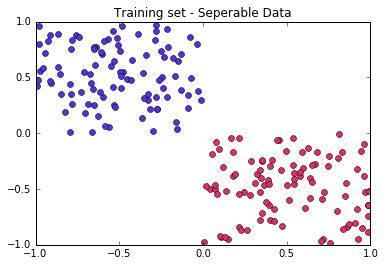

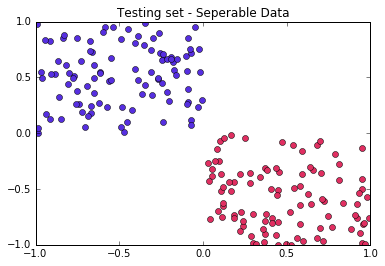

In [5]:
# Set the color for positive and negative training examples
color_str_pos = '#562FE0'
color_str_neg = '#E02F61'

# Plot the data
plot_data(train_sep, 'o', color_str_pos, color_str_neg, 'Training set - Seperable Data')
plot_data(test_sep, 'o', color_str_pos, color_str_neg, 'Testing set - Seperable Data')

### HW11.3:  Plot the non-seperable data

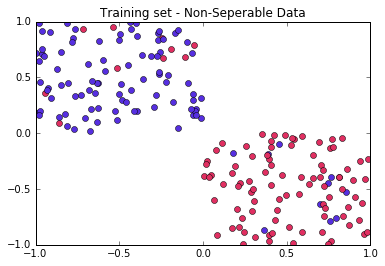

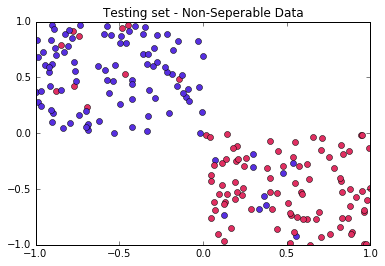

In [6]:
# Set the color for positive and negative training examples
color_str_pos = '#562FE0'
color_str_neg = '#E02F61'

# Plot the data
plot_data(train_nonsep, 'o', color_str_pos, color_str_neg, 'Training set - Non-Seperable Data')
plot_data(test_nonsep, 'o', color_str_pos, color_str_neg, 'Testing set - Non-Seperable Data')

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_weights_no_show(w, color_str, shape_str, num_iter=-1):
    x1 = [-1, 1]
    x2 = [-(i * w[0] + w[2]) / w[1] for i in x1]
    if num_iter != -1:
        plt.plot(x1, x2, color_str+shape_str, label="After "+str(num_iter)+" Iterations", linewidth=2.0)
    else:
        plt.plot(x1, x2, linewidth=2.0)        

#def plot_weights(w):
#    plot_weights_no_show(w)
#    plt.xlabel("x1")
#    plt.ylabel("x2")
#    plt.grid()
#    plt.show()

### HW11.3:  MLLib LASSO logistic regression model

Iteration  1
Testing Error = 0.155
Model Weights:  [0.27017159215,2.67374256643]
Iteration  3
Testing Error = 0.1
Model Weights:  [-0.992067832414,2.75757611752]
Iteration  5
Testing Error = 0.1
Model Weights:  [-2.17954829311,1.65032302984]
Iteration  6
Testing Error = 0.1
Model Weights:  [-2.2555696219,1.40299397128]
Iteration  7
Testing Error = 0.1
Model Weights:  [-2.23249497482,1.43640930506]
Iteration  8
Testing Error = 0.1
Model Weights:  [-2.22721258144,1.43817495253]


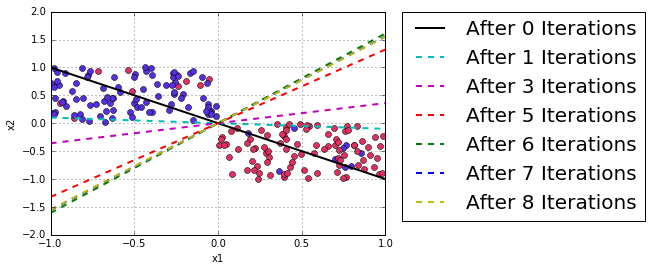

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionWithSGD, LogisticRegressionModel
from pyspark.mllib.regression import LabeledPoint

# Parse the data
def parse_point(point):
    label = point[2]
    if label == -1:
        label = 0
    # A labeled point contains the label and an array of values as the features
    return LabeledPoint(label, point[0:2])


#train_data = sc.parallelize(train_nonsep)
train_data = sc.parallelize(train_nonsep).map(parse_point)
#test_data = sc.parallelize(test_nonsep)
test_data = sc.parallelize(test_nonsep).map(parse_point)

# Plot the data points, but don't display them yet
plot_data_no_show(train_nonsep, 'o', color_str_pos, color_str_neg, '')

initial_weights = [1,1]
plot_weights_no_show([initial_weights[0], initial_weights[1], 0.0], 'k', '-', 0)

iterations = [1, 3, 5, 6, 7, 8]
colors = ['c', 'm', 'r', 'g', 'b', 'y']
for i, num_iter in enumerate(iterations):
    print 'Iteration ', str(num_iter)
    # Build the model
    model = LogisticRegressionWithLBFGS.train(train_data, iterations=num_iter, initialWeights=initial_weights, regType='l1')

    # Evaluating the model on training data
    labelsAndPreds = train_data.map(lambda p: (p.label, model.predict(p.features)))
    trainErr = labelsAndPreds.filter(lambda (v, p): v != p).count() / float(train_data.count())
    #print("Training Error = " + str(trainErr))

    # Evaluating the model on testing data
    labelsAndPreds = test_data.map(lambda p: (p.label, model.predict(p.features)))
    testErr = labelsAndPreds.filter(lambda (v, p): v != p).count() / float(test_data.count())
    print("Testing Error = " + str(testErr))

    plot_weights_no_show([model.weights[0], model.weights[1], model.intercept], colors[i], '--', num_iter)
    print 'Model Weights: ', model.weights

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()
    
# Save and load model
#model.save(sc, "target/tmp/pythonLogisticRegressionWithLBFGSModel1")
#sameModel = LogisticRegressionModel.load(sc,
#                                         "target/tmp/pythonLogisticRegressionWithLBFGSModel")

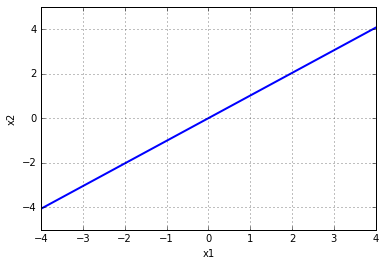

In [9]:
import numpy as np
#w = np.array([8, -3, -1])
w = np.array([-1.21377829324,1.19645867558, 0])
#w = np.array([0, -1.21377829324,1.19645867558])
dataWeights(w)

### HW11.3:  Homegrown LASSO logistic regression model

In [ ]:
# Plot model
y = [-(i * w[0] + model.intercept) / w[1] for i in x] (edited)  
plt.plot(x,y) 
where intercept is either 0, or w[2] if you have a third element
 
or, to write it differently: 
w = model
a = -w[0] / w[1]
xx = np.linspace(-1, 1)
yy = a * xx - w[2] / w[1]
plt.plot(xx, yy, 'k-')

In [19]:
from collections import namedtuple
import numpy as np
Point = namedtuple('Point', 'x y')

def readPoint(line):
    d = line.split(',')
    x = [float(i) for i in d[1:]]
    x.append(1.0)  #bias term
    return Point(x, float(d[0]))

def logisticRegressionGDReg(data, wInitial=None, learningRate=0.05, iterations=50, regParam=0.01, regType=None):
    featureLen = len(data.take(1)[0].x)
    n = data.count()
    if wInitial is None:
        w = np.random.normal(size=featureLen) # w should be broadcasted if it is large
    else:
        w = wInitial
    for i in range(iterations):
        wBroadcast = sc.broadcast(w)
        gradient = data.map(lambda p: (1 / (1 + np.exp(-p.y*np.dot(wBroadcast.value, p.x)))-1) * p.y * np.array(p.x))\
                    .reduce(lambda a, b: a + b)
        if regType == "Ridge":
            wReg = w * 1
            wReg[-1] = 0 #last value of weight vector is bias term, ignored in regularization
        elif regType == "Lasso":
            wReg = w * 1
            wReg[-1] = 0 #last value of weight vector is bias term, ignored in regularization
            wReg = (wReg>0).astype(int) * 2-1
        else:
            wReg = np.zeros(w.shape[0])
        gradient = gradient + regParam * wReg  #gradient:  GD of Sqaured Error+ GD of regularized term 
        w = w - learningRate * gradient / n
    return w

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

def iterationsPlot(fileName, truew):
    x1 = [-4, 4]
    
    w = truew
    x2 = [-(i * w[0] + w[2]) / w[1] for i in x1]
    plt.plot(x1, x2, 'b', label="True line", linewidth=4.0)
    
    np.random.seed(800)
    w = np.random.normal(0,1,3)
    x2 = [-(i * w[0] + w[2]) / w[1] for i in x1]
    plt.plot(x1, x2, 'r--', label="After 0 Iterations", linewidth=2.0)
    
    data = sc.textFile(fileName).map(readPoint).cache()
    w = logisticRegressionGDReg(data, w, iterations=30)
    x2 = [-(i * w[0] + w[2]) / w[1] for i in x1]
    plt.plot(x1, x2, 'g--', label="After 1 Iterations", linewidth=2.0)
    
    w = logisticRegressionGDReg(data, w, iterations=30)
    x2 = [-(i * w[0] + w[2]) / w[1] for i in x1]
    plt.plot(x1, x2, 'm--', label="After 2 Iterations", linewidth=2.0)
    
    w = logisticRegressionGDReg(data, w, iterations=30)
    x2 = [-(i * w[0] + w[2]) / w[1] for i in x1]
    plt.plot(x1, x2, 'y--', label="After 3 Iterations", linewidth=2.0)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()
    plt.show()

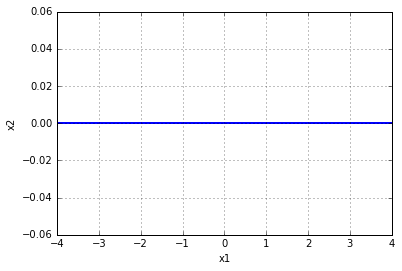

In [4]:
import numpy as np
w = np.array([8, -3, -1])
#w = np.array([0, 0, 0])
#dataWeights(w)
iterationsPlot('train_nonsep.csv',w)

<a name="HW10.4"><h2 style="color:darkblue"> HW11.4 SVMs  </h2>
[Back to Table of Contents](#TOC)

Use the non-linearly separable training and testing datasets from HW11.3 in this problem.

Using MLLib  train up a soft SVM model with the training dataset and evaluate with the testing set. What is a good number of iterations for training the SVM model? Justify with plots and words. 

Derive and Implement in Spark a weighted soft linear svm classification learning algorithm.
Evaluate your homegrown weighted soft linear svm classification learning algorithm on the weighted training dataset and test dataset from HW11.3. Report misclassification error (1 - Accuracy) and how many iterations does it took to converge?  How many support vectors do you end up?

Does Spark MLLib have a weighted soft SVM learner. If so use it and report your findings on the weighted training set and test set. 

In [65]:
## Code goes here

In [66]:
## Drivers & Runners

In [67]:
## Run Scripts, S3 Sync

<a name="HW11.5"><h2 style="color:darkgreen"> HW11.5  [OPTIONAL] Distributed Perceptron algorithm. </h2>
[Back to Table of Contents](#TOC)

Using the following papers as background:
http://static.googleusercontent.com/external_content/untrusted_dlcp/research.google.com/en//pubs/archive/36266.pdf

https://www.dropbox.com/s/a5pdcp0r8ptudgj/gesmundo-tomeh-eacl-2012.pdf?dl=0

http://www.slideshare.net/matsubaray/distributed-perceptron 

Implement each of the following flavors of perceptron learning algorithm:

1. Serial (All Data): This is the classifier returned if trained serially on all the available data.  On a single computer for example (Mistake driven)
2. Serial (Sub Sampling): Shard the data, select one shard randomly and train serially. 
3. Parallel (Parameter Mix): Learn a perceptron locally on each shard: 
Once learning is complete combine each learnt percepton using a uniform weighting
4. Parallel (Iterative Parameter Mix) as described in the above papers.

In [71]:
## Code goes here

In [72]:
## Drivers & Runners

In [73]:
## Run Scripts, S3 Sync

<a name="HW11.6"><h2 style="color:darkblue"> HW11.6 [OPTIONAL: consider doing this in a group]  Evalution of perceptron algorihtms on PennTreeBank POS corpus </h2>
[Back to Table of Contents](#TOC)

Reproduce the experiments reported in the following paper:

*Prediction with MapReduce - Andrea Gesmundo and  Nadi Tomeh*

http://www.aclweb.org/anthology/E12-2020 

These experiments focus on the prediction accuracy on a part-of-speech
(POS) task using the PennTreeBank corpus. They use sections 0-18 of the Wall
Street Journal for training, and sections 22-24 for testing.
 


<a name="HW11.7"><h2 style="color:darkgreen"> HW11.7 [OPTIONAL: consider doing this in a group] Kernal Adatron  </h2>
[Back to Table of Contents](#TOC)

Implement the Kernal Adatron in Spark (contact Jimi for details)


<a name="HW11.8"><h2 style="color:darkgreen"> HW11.8 [OPTIONAL] Create an animation of gradient descent for the Perceptron learning or for the logistic regression </h2>
[Back to Table of Contents](#TOC)
    
11.8 [OPTIONAL] Create an animation of gradient descent for the Perceptron learning or for the logistic regression learning with the following 3 training examples. Present the progress in terms of the 2 dimensional input space in terms of a contour plot and also in terms of the 3D surface plot. See Live slides for an example.

Here is a sample training dataset that can be used:
-2, 3, +1
-1, -1, -1
2, -3, 1

Please feel free to use 
 + R (yes R!)
 + d3
 + https://plot.ly/python/
 + Matplotlib

I am happy for folks to collaborate on HW11.8 also.

It would be great to get the 3D surface and contours lines (with solution region and label normalized data) all in the same graph

In [77]:
## Code goes here

In [78]:
## Drivers & Runners

In [79]:
## Run Scripts, S3 Sync

[Back to Table of Contents](#TOC)
<center><div class='jumbotron'><h2 style='color:green'>-------  END OF HOWEWORK --------</h2></div></center>